In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf
import ast

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import altair as alt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
filePath = r'https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/immobilienNuernberg_cleaned.csv'
df = pd.read_csv(filePath)

In [3]:
df['constructionYear'] = pd.to_numeric(df['constructionYear'])
df['livingSpace'] = pd.to_numeric(df['livingSpace'])
df['energyEfficiency'] = df['energyEfficiency'].astype('category')
df['photosCount'] = pd.to_numeric(df['photosCount'])
df['localAmenitiesScore'] = pd.to_numeric(df['localAmenitiesScore'])
df['localMobilityScore'] = pd.to_numeric(df['localMobilityScore'])
df['latitudeDistrict'] = pd.to_numeric(df['latitudeDistrict'])
df['longitudeDistrict'] = pd.to_numeric(df['longitudeDistrict'])
df['district'] = df['district'].astype('category')
df['price'] = pd.to_numeric(df['price'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['energyClass'] = df['energyClass'].astype('category')
df['energySources'] = df['energySources'].astype('category')
df['energyEfficiency'] = df['energyEfficiency'].astype('category')
df['elevator'] = df['elevator'].astype('category')
df['sauna'] = df['sauna'].astype('category')
df['swimmingpool'] = df['swimmingpool'].astype('category')
df['kitchenEqipped'] = df['kitchenEqipped'].astype('category')
df['cellar'] = df['cellar'].astype('category')
df['storageRoom'] = df['storageRoom'].astype('category')
df['wheelchairAccessible'] = df['wheelchairAccessible'].astype('category')
df['assistedLiving'] = df['assistedLiving'].astype('category')
df['parkingSlots'] = df['parkingSlots'].astype('category')
df['guestToilet'] = df['guestToilet'].astype('category')
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].astype('category')
df['chimney'] = df['chimney'].astype('category')
df['attics'] = df['attics'].astype('category')

In [9]:
# Zeige die ersten Zeilen
pd.set_option('display.max_columns', None)
df.head()

,energyEfficiency,price,constructionYear,livingSpace,energySources,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,district,rooms,energyClass,elevator,sauna,swimmingpool,kitchenEqipped,cellar,storageRoom,wheelchairAccessible,assistedLiving,parkingSlots,guestToilet,privateOutdoorSpace,chimney,attics
0,0,225000.0,1900.0,69.00,1.0,23.0,6.5,9.7,49.42749,11.07581,Gibitzenhof,2.0,NaN,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,195000.0,1972.0,69.46,2.0,1.0,5.7,7.8,49.40815,11.13376,Langwasser,3.0,NaN,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,483623.0,2023.0,82.81,9.0,6.0,8.2,9.6,49.46008,11.04266,Seeleinsbühl,3.0,1.0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,1,433956.0,2023.0,75.52,9.0,6.0,8.2,9.6,49.46008,11.04266,Seeleinsbühl,3.0,1.0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,1,251000.0,2023.0,46.77,9.0,6.0,8.2,9.6,49.46008,11.04266,Seeleinsbühl,2.0,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [13]:
df.drop('district', axis=1, inplace=True)

In [22]:
# Entfernen von Zeilen mit fehlenden Werten in 'energyClass'
df_new = df.dropna(subset=['energyClass'])

# Modell 1: 'price' als abhängige Variable
X_price = df_new.drop('price', axis=1)
y_price = df_new['price']

# Modell 2: 'energyEfficiency' als abhängige Variable
X_energy = df_new.drop('energyEfficiency', axis=1)
y_energy = df_new['energyEfficiency']

# Aufteilen der Daten für das Modell mit 'price' als abhängige Variable
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
    X_price, y_price, test_size=0.2, random_state=42, stratify=df_new['energyClass'])

df_train_price = pd.concat([X_train_price, y_train_price], axis=1)

# Aufteilen der Daten für das Modell mit 'energyEfficiency' als abhängige Variable
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X_energy, y_energy, test_size=0.2, random_state=42, stratify=df_new['energyClass'])

df_train_energy = pd.concat([X_train_energy, y_train_energy], axis=1)

print("X_train_price:", X_train_price.shape)
print("X_test_price:", X_test_price.shape)
print("X_train_energy:", X_train_energy.shape)
print("X_test_energy:", X_test_energy.shape)

X_train_price: (490, 24)
X_test_price: (123, 24)
X_train_energy: (490, 24)
X_test_energy: (123, 24)


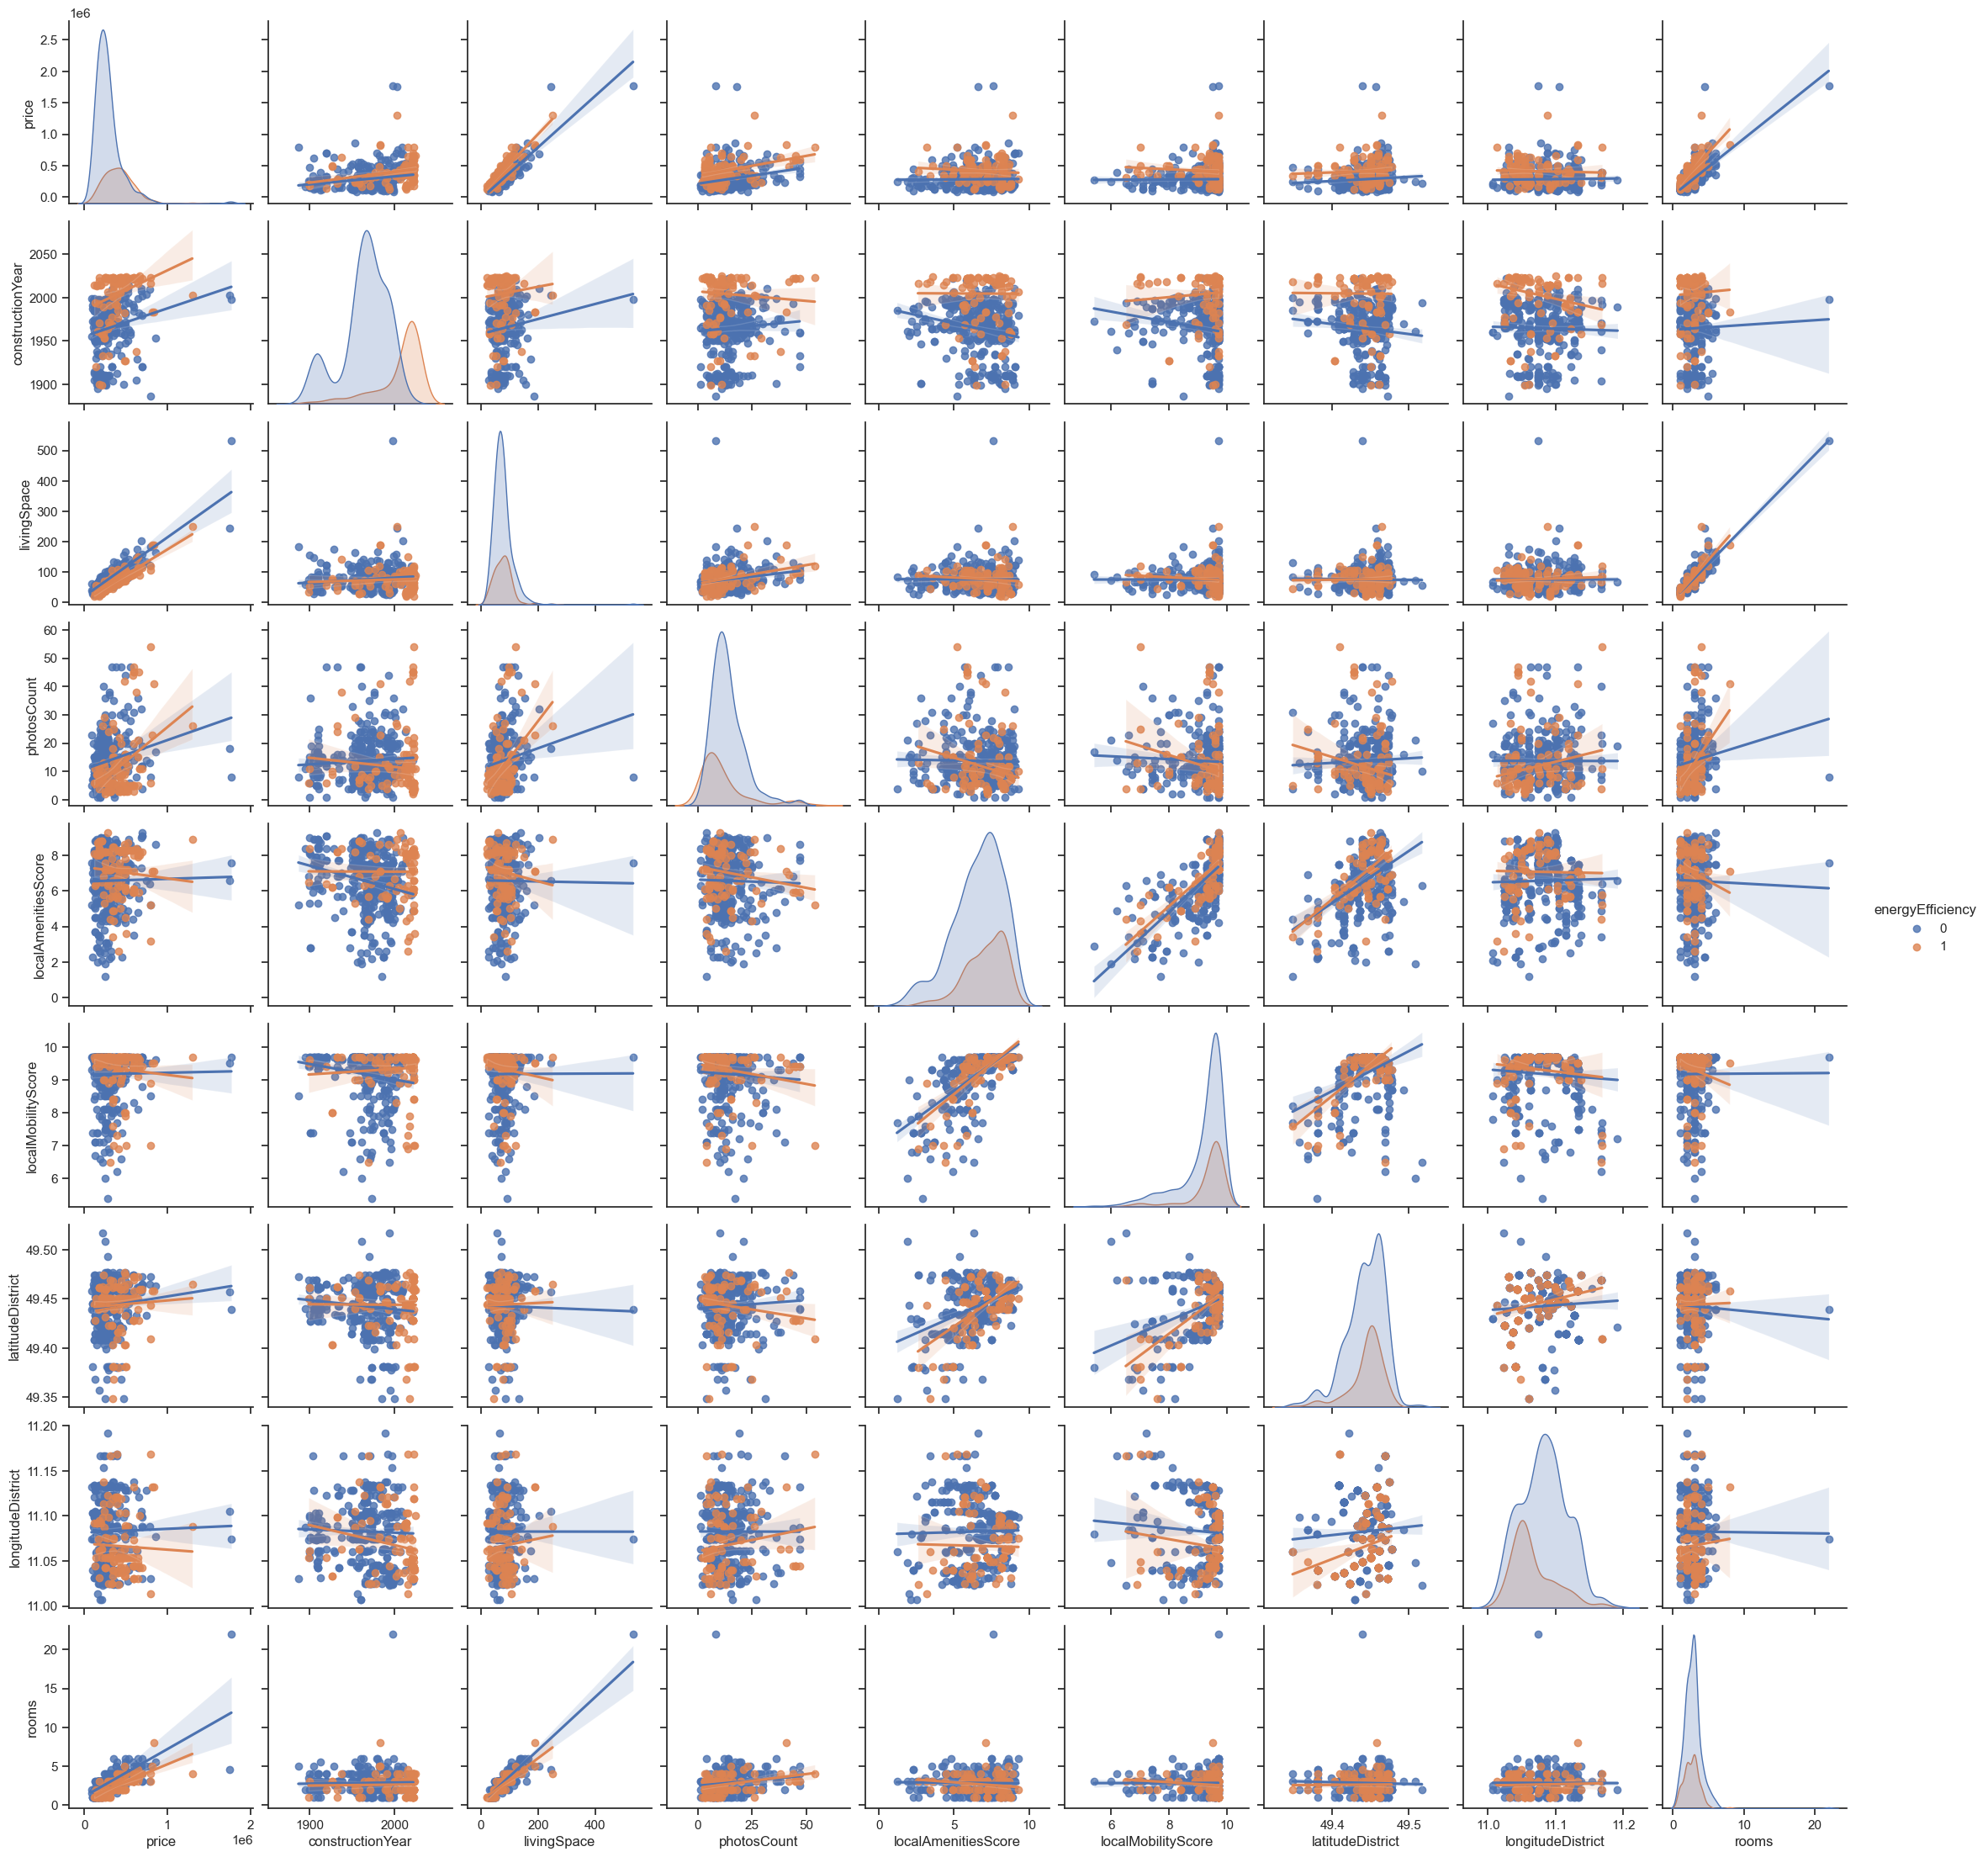

In [21]:
# 'energyEfficiency'
sns.pairplot(hue='energyEfficiency', kind="reg", diag_kind="kde", data=df_train_energy)

In [23]:
df.corr().round(2)

C:\Users\papad\AppData\Local\Temp\ipykernel_3164\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,price,constructionYear,livingSpace,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,rooms
price,1.00,0.40,0.80,0.22,-0.05,-0.08,0.04,0.04,0.63
constructionYear,0.40,1.00,0.06,0.03,-0.15,-0.15,-0.11,-0.01,-0.03
livingSpace,0.80,0.06,1.00,0.19,-0.04,-0.02,0.01,0.02,0.88
photosCount,0.22,0.03,0.19,1.00,-0.10,-0.25,-0.12,0.20,0.14
localAmenitiesScore,-0.05,-0.15,-0.04,-0.10,1.00,0.67,0.46,-0.07,-0.07
localMobilityScore,-0.08,-0.15,-0.02,-0.25,0.67,1.00,0.38,-0.19,-0.04
latitudeDistrict,0.04,-0.11,0.01,-0.12,0.46,0.38,1.00,-0.04,-0.02
longitudeDistrict,0.04,-0.01,0.02,0.20,-0.07,-0.19,-0.04,1.00,0.00
rooms,0.63,-0.03,0.88,0.14,-0.07,-0.04,-0.02,0.00,1.00


In [15]:
from sklearn.linear_model import LogisticRegression

In [24]:
# only select meaningful predictors

features_model = ['constructionYear', 'energySources']

X_train_energy = X_train_energy[features_model] 
X_test_energy = X_test_energy[features_model]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [27]:
# model
clf = LogisticRegressionCV()

In [28]:
# fit model to data
clf.fit(X_train_energy, y_train_energy)

LogisticRegressionCV()

In [29]:
clf.intercept_

array([-91.42242421])

In [30]:
clf.coef_

array([[0.04550604, 0.00664374]])

In [31]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test_energy, y_test_energy)

0.926829268292683

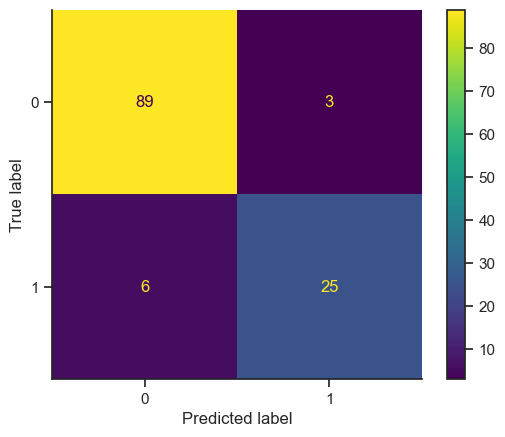

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test_energy, y_test_energy);

In [33]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_energy)

print(classification_report(y_test_energy, y_pred_energy, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.91      0.95      0.93        92
         Yes       0.81      0.71      0.76        31

    accuracy                           0.89       123
   macro avg       0.86      0.83      0.84       123
weighted avg       0.88      0.89      0.88       123



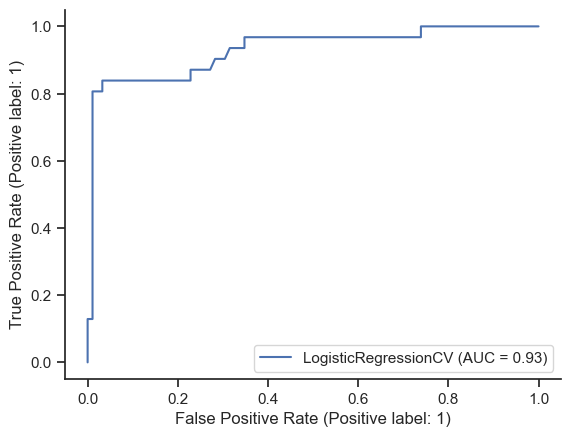

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test_energy, y_test_energy) ;

In [36]:
from sklearn.metrics import roc_auc_score

y_score = clf.predict_proba(X_test_energy)[:, 1]
roc_auc_score(y_test_energy, y_score)

0.9302244039270687